# SALARY PREDICTION

## DEFINE

### PROBLEM DEFINITION

This dataset consists of 1 million jobs and their estimated salaries based on features like<br>
<b>JOB TYPE</b> - Janitor, Manager, CEO, CFO etc.<br>
<b>DEGREE</b> - High school, College, Master's etc. <br>
<b>MAJOR</b> - Physics, Biology, Maths etc.<br>
<b>INDUSTRY</b> - Health, Finance, Oil etc.<br>
<b>YEARS_OF_EXPERIENCE</b>  - Candidate experience in years<br>
<b>MILES_FROM_METROLPOLIS</b> - Distance from the metropolis<br>
Every row(job) has a unique <b>JOB_ID</b>, there is a column, <b>COMPANY_ID</b> which is the company identifier.  
<H3>The task here is to:</H3><br> - Load the data, Understand the data, Find relationships between attributes <br>- Establish a baseline model, Engineer features, Optimize the data features <br>- Select the best model with the lowest Evaluation metric and <br>- <b>Predict salaries of another 1 million job features using the selected model</b>


In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as mse

__author__ = "Sushant Wavhal"
__email__ = "sushantw71@gmail.com"

## DISCOVER

### Loading Data

In [2]:
#load the data into a Pandas dataframe

In [3]:
train_features = pd.read_csv('data/train_features.csv')
train_salaries = pd.read_csv('data/train_salaries.csv')
test_features = pd.read_csv('data/test_features.csv')

### Exploring the Data

In [4]:
train_features.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [5]:
train_salaries.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [6]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [7]:
train_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
jobId     1000000 non-null object
salary    1000000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [8]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [9]:
train_features['jobId'].nunique()

1000000

In [10]:
train_features['companyId'].nunique()

63

Text(0, 0.5, 'Count')

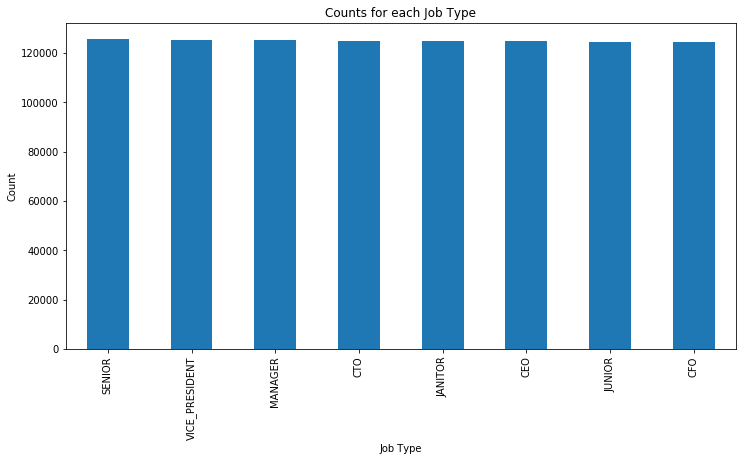

In [11]:
jt = train_features['jobType'].value_counts().plot(kind='bar',figsize=(12,6),title="Counts for each Job Type")
jt.set_xlabel("Job Type")
jt.set_ylabel("Count")

In [12]:
#From the above chart, we can conclude that the records for all job types are equally distributed. The data is balanced

Text(0, 0.5, 'Count')

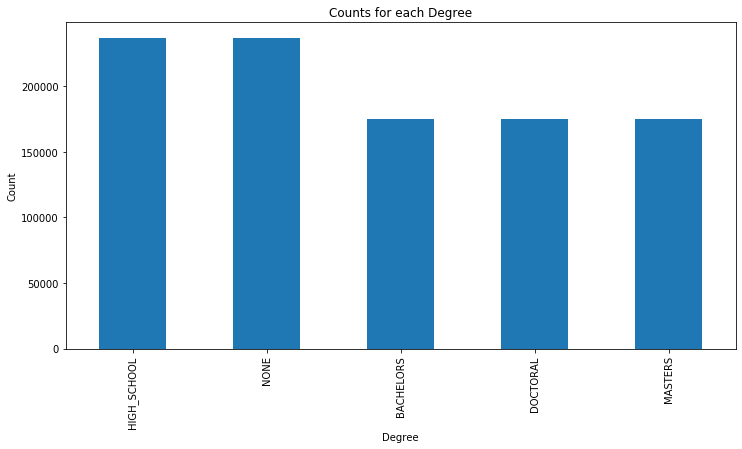

In [13]:
de = train_features['degree'].value_counts().plot(kind='bar',figsize=(12,6),title="Counts for each Degree")
de.set_xlabel("Degree")
de.set_ylabel("Count")

In [14]:
#From the above chart, we can conclude that the records for all degree types are equally distributed. The data is balanced

Text(0, 0.5, 'Count')

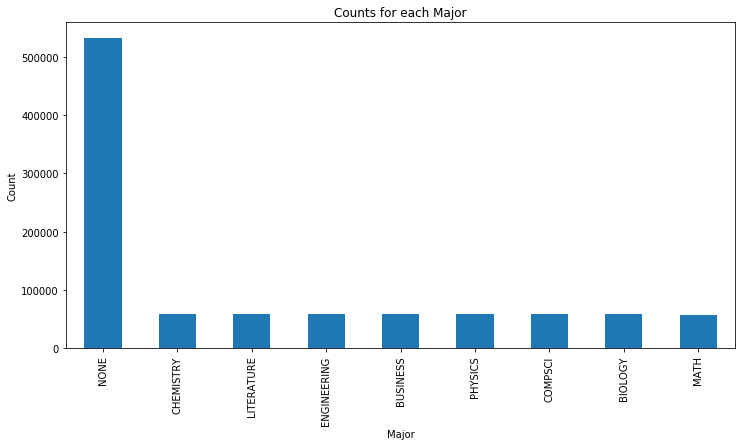

In [15]:
mj = train_features['major'].value_counts().plot(kind='bar',figsize=(12,6),title="Counts for each Major")
mj.set_xlabel("Major")
mj.set_ylabel("Count")

In [16]:
#From the above chart, we can conclude that the records for all major types are equally distributed except for 'None' type. 
#It will be examined later

Text(0, 0.5, 'Count')

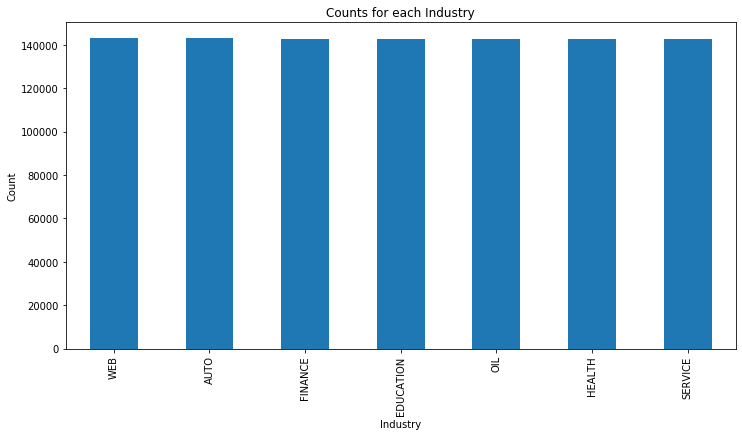

In [17]:
ind = train_features['industry'].value_counts().plot(kind='bar',figsize=(12,6),title="Counts for each Industry")
ind.set_xlabel("Industry")
ind.set_ylabel("Count")

In [18]:
# From the above chart, we can conclude that the records for all job types are equally distributed. The data is balanced

Text(0, 0.5, 'Count')

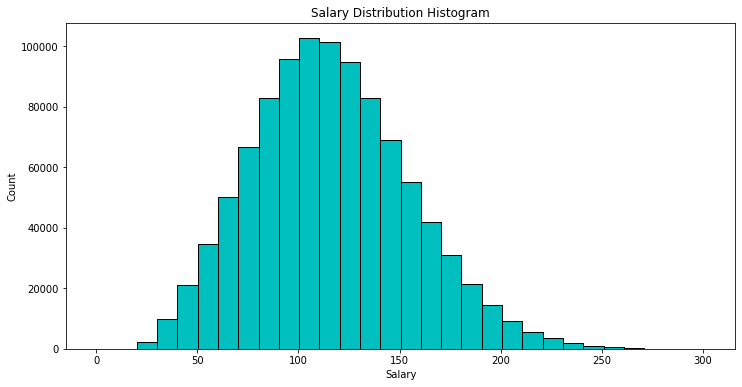

In [110]:
train_salaries['salary'].hist(bins=30,ec='black',figsize=(12,6),color='c')
plt.grid(b=None)
plt.title('Salary Distribution Histogram')
plt.xlabel('Salary')
plt.ylabel('Count')

<H3>Key Findings:</H3><br>
<b>1.</b>&nbsp;1000000 rows of data<br>
<b>2.</b>&nbsp;3 numerical features (yearsExperience, milesFromMetropolis & salary)<br>
<b>3.</b>&nbsp;4 categorical features (jobType, degree, major, industry)<br>
<b>5.</b>&nbsp;Unique identifier - jobId<br>
<b>6.</b>&nbsp;63 unique companies and 1,000,000 unique Job id's<br>
<b>7.</b>&nbsp;The salary histogram is right skewed, and most values lie between 70k to 150k<br>
<b>8.</b>&nbsp;The dataset is balanced. Each category in the categorical features has almost same number of records.<br>
    &emsp; But for the category 'NONE' in majors, the count is much higher than all others. 
 


In [20]:
#Merge train features dataframe and train salaries dataframe on jobId
train_df=pd.merge(train_features,train_salaries,on='jobId')
train_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


### Data Cleaning

In [21]:
#looking for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it

In [22]:
train_df.duplicated().sum()

0

In [23]:
test_features.duplicated().sum()

0

In [24]:
#Checking for null values
(train_df.salary<=0).sum()

5

In [25]:
#It is found that, there are some records with salary values as 0, it indicates rogue data. Thus, it's wise to exclude 
#these records from the dataset. There cannot be jobs which aren't paid a salary.

In [26]:
#Removing those entries with salary<=0
train_df.drop(train_df[train_df['salary'] <= 0].index, inplace = True)

In [27]:
train_df.shape

(999995, 9)

### Exploratory Data Analysis (EDA)

In [28]:
train_df.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

In [29]:
print('Columnwise Unique values : \n')
for col in train_df:          
    print(col," ---", train_df[col].nunique())
    


Columnwise Unique values : 

jobId  --- 999995
companyId  --- 63
jobType  --- 8
degree  --- 5
major  --- 9
industry  --- 7
yearsExperience  --- 25
milesFromMetropolis  --- 100
salary  --- 279


### Finding outliers using IQR

In [30]:
salary_data = train_df['salary'].describe()
print(salary_data)

IQR = salary_data['75%'] - salary_data['25%']

upperbound = salary_data['75%'] + 1.5 * IQR

lowerbound = salary_data['25%'] - 1.5 * IQR

print('\n')
print('Upper bound: {}, Lower bound: {}.'.format(upperbound, lowerbound))


count    999995.000000
mean        116.062398
std          38.717163
min          17.000000
25%          88.000000
50%         114.000000
75%         141.000000
max         301.000000
Name: salary, dtype: float64


Upper bound: 220.5, Lower bound: 8.5.


In [31]:
#Let's find the data records below the lower bound
train_df[(train_df.salary<8.5)]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary


In [32]:
#No records less than 8.5
#Looks like the data records less that the lower bound value were all with zero salary which were deleted earlier

In [33]:
train_df = train_df[train_df['salary'] > 8.5]

In [34]:
train_df.shape

(999995, 9)

<b>Examine the dataset to understand which type of job's have a salary that's greater than the 75th percentile</b>

In [35]:
train_df[train_df['salary'] > 220.5].groupby('jobType')['salary'].count()

jobType
CEO               3227
CFO               1496
CTO               1488
JUNIOR              20
MANAGER            217
SENIOR              66
VICE_PRESIDENT     603
Name: salary, dtype: int64

<b>A junior job type having a salary greater than 220.5k is odd and should be examined further</b>

In [36]:
train_df[(train_df.salary>220.5) & (train_df.jobType == "JUNIOR")]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
189582,JOB1362684597269,COMP32,JUNIOR,DOCTORAL,BUSINESS,OIL,24,11,221
214606,JOB1362684622293,COMP47,JUNIOR,MASTERS,BUSINESS,FINANCE,22,4,222
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
427593,JOB1362684835280,COMP54,JUNIOR,DOCTORAL,ENGINEERING,FINANCE,23,3,221


<b>Examining the Junior's having salary greater than 220.5k, it is found that they work in high paying industries like 'Finance ' and 'Oil', also they have atleast 2 decades of experience thus having a high salary is justified. Hence we should leave these data records as is</b>

Earlier, it was found that category 'NONE' in degree has the most count i.e Count of people with no degree is a lot higher than all others with degrees.<br> Let's investigate further!

In [37]:
train_df[train_df['degree'] == 'NONE'].groupby('jobType')['degree'].count()

jobType
CEO               24898
CFO               24714
CTO               24882
JANITOR           62544
JUNIOR            24781
MANAGER           25092
SENIOR            25117
VICE_PRESIDENT    24825
Name: degree, dtype: int64

In [38]:
train_df[train_df['degree'] == 'NONE'].groupby('industry')['degree'].count()

industry
AUTO         33913
EDUCATION    33744
FINANCE      33860
HEALTH       33658
OIL          33727
SERVICE      34162
WEB          33789
Name: degree, dtype: int64

In [39]:
nodegree = pd.DataFrame(train_df[train_df['degree'] == 'NONE'].groupby('jobType')['salary'].mean())

In [40]:
nodegree['25th_percentile'] = train_df.groupby('jobType')['salary'].quantile(0.25)
nodegree

,salary,25th_percentile
jobType,,
CEO,130.796690,120.0
CFO,121.135389,111.0
CTO,120.939193,111.0
JANITOR,70.649575,52.0
JUNIOR,80.884064,74.0
MANAGER,100.981070,93.0
SENIOR,90.628738,83.0
VICE_PRESIDENT,111.207654,102.0


After examining the data throughly, the people who do not have a degree i.e degree = 'NONE' <br>
&emsp;Equally distributed in all job types<br>
&emsp;Equally distributed in all the industries<br>
&emsp;Count of janitors is more than double of any other job type<br>
&emsp;Have salaries near to the lowest 25th percentile of all job types<br>
<b>From the above observations it is safe to say that the upsurged count in 'NONE' degree counts will not have a negative impact on the integrity of this data and should be left untouched for further analysis</b>


In [41]:
#Visualize target variable distribution and boxplot

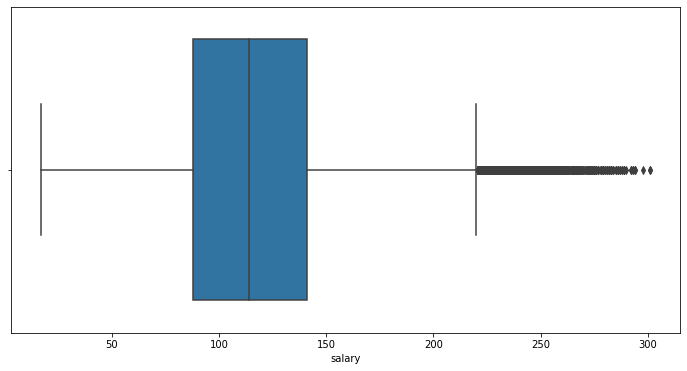

In [42]:
plt.figure(figsize=(12,6))
sns.boxplot(train_df['salary'])

## Distribution of Categorical variables

Text(0.5, 1.0, 'Job Type Distribution')

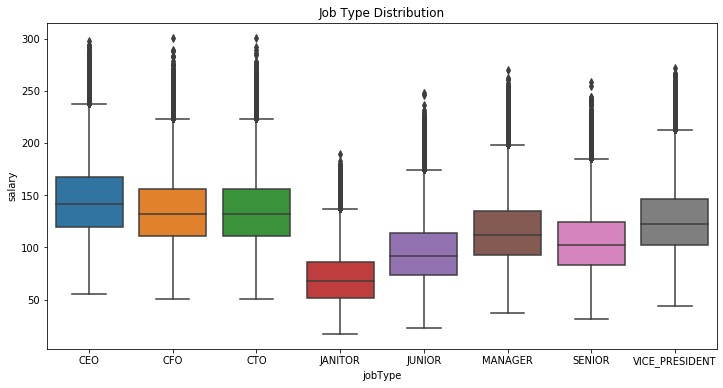

In [89]:
plt.figure(figsize=(12,6))
jt_box = sns.boxplot(x='jobType',y='salary',data=train_df)
jt_box.set_title('Job Type Distribution')

In [90]:
#The job_type CEO has the highest salary distribution and the Janitor has the lowest.

Text(0.5, 1.0, 'Degree Distribution')

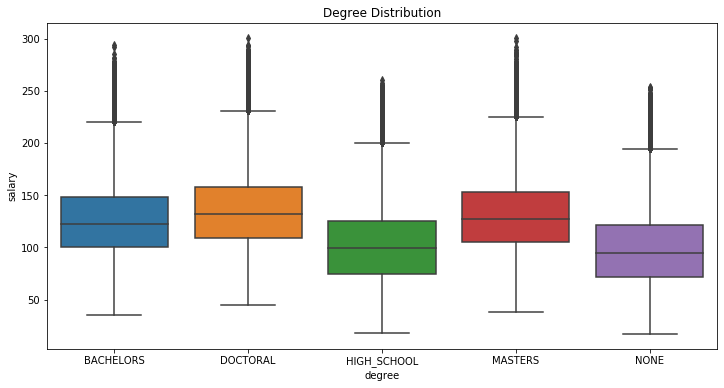

In [88]:
plt.figure(figsize=(12,6))
deg_box = sns.boxplot(x='degree',y='salary',data=train_df)
deg_box.set_title('Degree Distribution')

In [91]:
#The degrees 'Doctoral' and 'Masters' has a higher salary distribution and people with no major (i.e "NONE") has the lowest

Text(0.5, 1.0, 'Major Distribution')

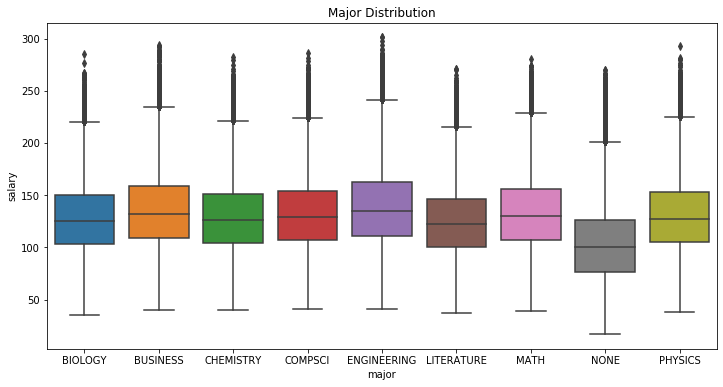

In [87]:
plt.figure(figsize=(12,6))
maj_box = sns.boxplot(x='major',y='salary',data=train_df)
maj_box.set_title('Major Distribution')

In [92]:
#All the majors have more or less the same salary distribution. 
#Although Engineering major seems to have a little edge over Business major.
#NOne major has the lowest distribution

Text(0.5, 1.0, 'Industry Distribution')

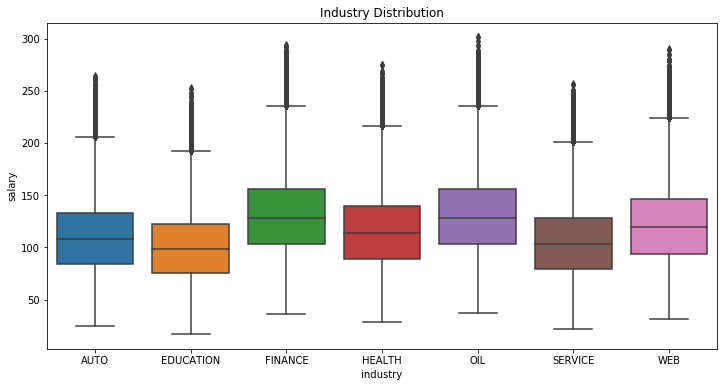

In [86]:
plt.figure(figsize=(12,6))
ind_box = sns.boxplot(x='industry',y='salary',data=train_df)
ind_box.set_title('Industry Distribution')

In [93]:
#Industries 'Oil' and 'Finance' seems to have the highest salary distribution than others.

## Distribution of Numerical variables

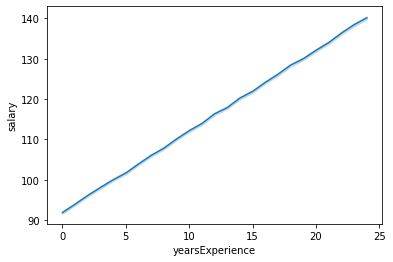

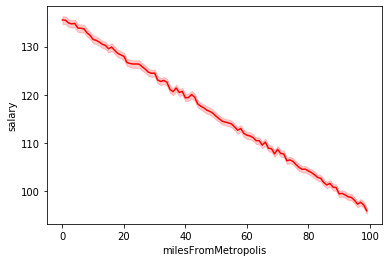

In [47]:
#drawing lineplots
sns.lineplot(x='yearsExperience', y='salary', data=train_df)
plt.show()

sns.lineplot(x='milesFromMetropolis', y='salary', data=train_df, color="red")
plt.show()

<H3>The numerical variables show an interesting relationship with the dependent variable(salary).</H3><br>
    The yearsExperience variable has a positive and steady relationship with salary which means, as the years of experince        increase the salary will also increase substantially<br>
    <br>
    The milesFromMetropolis variable has a negative and steady relationship with salary which means, as the job location is         further away from the metropolis the salary will go on decreasing

### Finding Correlation between the job features and the target variable

The categorical features must be substituted by the mean salary of that particular subcategoey in order to create a proper correlation matrix

In [48]:
#Creating a copy of main dataframe for the correlation purpose

In [49]:
train_df[['companyId','jobType','major','degree','industry']]=train_df[['companyId',
    'jobType','major','degree','industry']].astype('category')

In [50]:
corr_df = train_df.copy()

In [51]:
def all_nums(df,col):
    features_cat = {}
    features_col = df[col].cat.categories.tolist()
    for category in features_col:
        features_cat[category] = train_df[train_df[col] == category]['salary'].mean()
    df[col] = df[col].map(features_cat)

In [52]:
for col in corr_df.columns:
    if corr_df[col].dtype.name == 'category':
        all_nums(corr_df, col)

In [53]:
corr_df[['companyId','jobType','major','degree','industry']]=corr_df[['companyId',
    'jobType','major','degree','industry']].astype('float64')

Text(0.5, 1, 'Correlation Matrix')

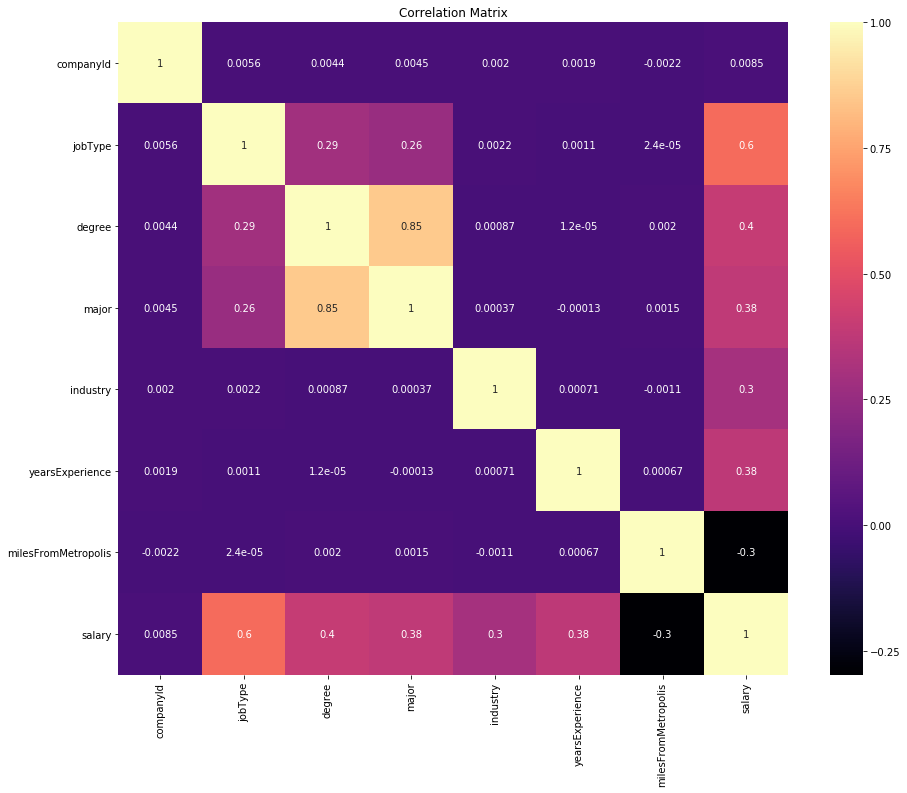

In [84]:
corr = corr_df.corr()
plt.subplots(figsize=(15,12))
ax = sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values, annot=True, cmap='magma')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title('Correlation Matrix')

- Positive correlation between variables job_Type, degree, major, industry, yearsExperience and Salary
- Negative correlation between variable milesFromMetropolis and Salary
- Strong positive correlation between degree and major which is likely to be
- Weak yet positive correlation between job_Type and degree, major
- job_id & company_id have a wekest possible or a negligible correlation with salary

## Establishing a baseline model

<H3>Let's consider a model that predicts the salary based on the job type, that job id belongs to.</H3><br>
<b>For instance, if mean salary of Manager is 100k, then all the jobs with job type 'Manager' will have 100k as their predicted salary   </b>

In [55]:
def baseline(df,col):
    
    jobs_dict = {}
    pred_salary = []
    jobs = df[col].cat.categories.tolist()
    
    for job in jobs:
        jobs_dict[job] = train_df[train_df[col] == job]['salary'].mean()
    
    pred_salary = df[col].map(jobs_dict)
    
    return pred_salary

In [56]:
baseline(train_df,'jobType')

0         135.458547
1         145.311425
2         125.368630
3         115.368518
4         125.368630
             ...    
999995    125.368630
999996    135.481067
999997     95.333087
999998    135.458547
999999     95.333087
Name: jobType, Length: 999995, dtype: category
Categories (8, float64): [145.311425, 135.458547, 135.481067, 70.813045, 95.333087, 115.368518, 105.487775, 125.368630]

In [57]:
baseline_score = mse(train_df['salary'], baseline(train_df, 'jobType'))
print('baseline_model has an MSE of: ',baseline_score ) 

baseline_model has an MSE of:  963.9252996562975


Our aim is to achieve a better score than this!
By doing some feature engineering and encoding categorical features, it seems possible to achieve a much lower score.

### Models to be used for predicting salaries: 

1. Linear Regression
2. Random Forest Regressor
3. Gradient Boosting Regressor

The main task of this project is prediction of salaries, the first and the most basic model for that purpose is the <b>Linear Regression</b> model<br>
To improve our results <b>Random Forest regressor</b> will be used, as this model does not rely too heavily on an individual procedure, it makes fair use of all potential predictive features<br>
To also account the effect of weakly correlated features, <b>Gradient boosting regressor</b> will be used because it combines weak learners into a single strong learner in an iterative fashion

## DEVELOP

### Feature Engineering

--&ensp;<b>'jobId'</b> is a feature that is unique to each and every record in the data, thus it won't be considered for modeling<br>
--&ensp;<b>companyId</b> has a correlation of 0.008 which is negligible and so won't be considered for modeling<br>
--&ensp;<b>'jobType', 'degree', 'major', 'industry'</b> are categorical features, one-hot encoding will be applied on these    features <br>
--&ensp;<b>'yearExperience' & 'milesFromMetropolis'</b> are numerical features which will be left as is for modeling

#### Let's create a dataset without 'jobId' and 'companyId' and the target variable 'salary' for easier analysis

In [58]:
data_feat = train_df.drop(columns=['jobId','companyId','salary'])

In [59]:
data_target = train_df['salary']

### One-hot Encoding - getting dummies for the categorical data

The reason we do one-hot encoding because it enables us to use a single regression equation to represent multiple groups instead of seperate regression models for each subgroup

In [60]:
JobType = pd.get_dummies(data_feat['jobType'],drop_first=True)
Degree = pd.get_dummies(data_feat['degree'],drop_first=True)
Major = pd.get_dummies(data_feat['major'],drop_first=True)
Industry = pd.get_dummies(data_feat['industry'],drop_first=True)

After one-hot encoding we need to concatenate these dummies to the original dataset and also drop the original feature columns as their purpose has been served by the dummies.

In [61]:
data_feat = pd.concat([data_feat,JobType],axis=1)
data_feat = pd.concat([data_feat,Degree],axis=1)
data_feat = pd.concat([data_feat,Major],axis=1)
data_feat = pd.concat([data_feat,Industry],axis=1)

In [62]:
data_feat =data_feat.drop(columns=['jobType','degree','major','industry'])

In [94]:
data_feat.shape

(999995, 27)

### Creating models

In [63]:
X = data_feat
y = data_target

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [65]:
lr = LinearRegression()

rfr = RandomForestRegressor(n_estimators=200, n_jobs=2, max_depth=30, 
                           min_samples_split=60, max_features='auto', verbose=0)

gbr = GradientBoostingRegressor(n_estimators=160, max_depth=6, loss='ls',verbose=0)

### Model Evaluation

In [66]:
#initialize model list and dicts
models = []
mean_mse = {}
cv_std = {}

In [67]:
def training_model(model,X_train,y_train, mean_mse, cv_std):
    print("MODEL NAME: \n",model)
    neg_mse= cross_val_score(model,X_test,y_test,cv=5,scoring='neg_mean_squared_error')
    mean_mse[model] = -1.0*np.mean(neg_mse)
    cv_std[model] = np.std(neg_mse)
    print('AVERAGE MSE:\n', mean_mse[model])
    print('STANDARD DEVIATION:\n', cv_std[model])

In [68]:
models.extend([lr, rfr, gbr])

In [69]:
print("5 - FOLD CROSS-VALIDATION \n")

for model in models:
    training_model(model, X_train, y_train, mean_mse, cv_std)

5 - FOLD CROSS-VALIDATION 

MODEL NAME: 
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
AVERAGE MSE:
 385.2392599203028
STANDARD DEVIATION:
 1.8962956346321653
MODEL NAME: 
 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=60,
                      min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=2,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)
AVERAGE MSE:
 377.06113922806134
STANDARD DEVIATION:
 1.4933869093483159
MODEL NAME: 
 GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=6,
                          max_features=None, max_leaf_nodes=None,
                          min_impuri

### Selecting the best model <br>
The model with the lowest Mean_square_error(MSE) will be the best model.

In [70]:
model = min(mean_mse, key=mean_mse.get)
print('\nBest model is: \n')
print(model)


Best model is: 

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=6,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=160,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


We need to fit the <b>'GRADIENT BOOSTING REGRESSOR'</b> model on all the training data to make future salary predictions from the  test dataset

In [71]:
model.fit(X,y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=6,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=160,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

## DEPLOY

The test data should be cleaned as the train data was cleaned and it should undergo the same encoding and the manipulation to match the shape of the training dataset

In [72]:
test_feat = test_features.copy()
test_feat[['jobType','major','degree','industry']]=test_feat[['jobType','major',
                                                                      'degree','industry']].astype('category')

In [73]:
test_cats = ['jobType','major','degree','industry']

In [74]:
def encode(df):
    for col in df.columns:
        
        if df[col].dtype.name == 'object':
            df.drop(col,axis=1,inplace=True)
            
        elif df[col].dtype.name == 'category':
            col = pd.get_dummies(df[col],drop_first=True)
            df = pd.concat([df,col],axis=1)
    
    return df     

In [75]:
data_test = encode(test_feat)

In [76]:
#Droppping the original columns as they are encoded already
data_test.drop(test_cats,axis=1,inplace=True)

In [77]:
#predicying the salaries from test dataset
predictions = pd.DataFrame(model.predict(data_test)) 

In [78]:
#Concatenating the predicted salaries to the original test dataset
prediction_df=pd.concat([test_features,predictions],axis=1)

In [79]:
#Exporting the final predicted dataset to a csv file
prediction_df.to_csv('salaries_predicted.csv')

### Feature Importances  

In [80]:
# get importance
importance = model.feature_importances_
feature_importances = pd.DataFrame({'feature':data_test.columns, 'importance':importance})
feature_importances.sort_values(by='importance', ascending=False, inplace=True)
#set index to 'feature'
feature_importances.set_index('feature', inplace=True, drop=True)

Text(0.5, 1.0, 'FEATURE IMPORTANCE PLOT')

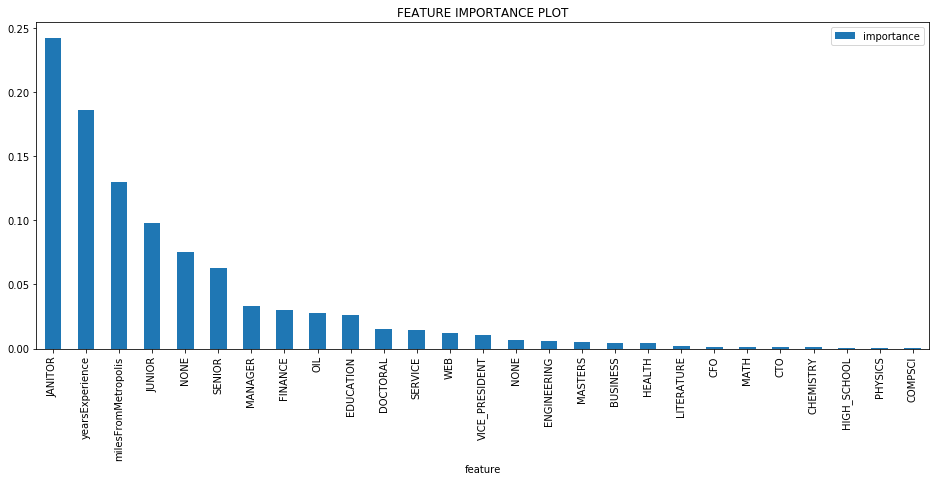

In [99]:
fig = feature_importances[0:27].plot.bar(figsize=(16,6))
fig.set_title('FEATURE IMPORTANCE PLOT')


## THANK YOU!